## Task 04: Linear Regression Pytorch Way

There is a rythm to implement the pytorch programs

* Model and network
    - Forward pass
* Loss and Optimizer
* Training loop

We will use the same linear regression example as before (Task 02 and Task 03) for this task and use pytorch natively for all the coding implementations

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

Let us make use of a randomly-created sample dataset as follows

In [2]:
#sample-dataset
x_data = torch.Tensor([[1.0], [2.0],[3.0]])
y_data = torch.Tensor([[2.0], [4.0],[6.0]])

## Task: 04 - a
Define a Pytorch Model Class that takes care of executing our hypothesis function defined as a linear model as follows:
$y = x * w + b$

In [3]:
## Model network and forward pass

class Model(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate 2 nn.linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1,1) # One data in and one out for x and y
        
    def forward(self, x):
        """
        In forward function we accept the input variable and we return variable for the output
        We can use the modules defined in the constructor and arbitary operations
        on the variable as well"""
        y_pred = self.linear(x)
        return y_pred

# Our model
model = Model()

## Task: 04 - b
Define the loss-function criterion (MSE Loss in our case) and the optimizer (the function which performs gradient descent). \\

Specifically, define an SGD optimizer with a learning-rate of 0.01

In [4]:
# Loss function and optimizer.
# model.parameters() automatically calcuates the gradient for all the weights in the network

criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

/home/sanvik/.local/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Task: 04 - c
Implement a training-loop using Pytorch Syntax. The main-components involved in this loop are:
* Forward Pass
* Computing Loss
* Setting Gradients to zero
* Calculating Gradients
* Updating weights

In [8]:
# Training loop
loss_list, epoch_list = [], []

for epoch in range (100):
    # Using forward pass to calcuate the prediction
    y_pred = model(x_data)
    
    # Compute and print the loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch+1}, Loss:  {loss.item()}')
    
    # Making the gradients zero and then doing a backward pass to calcuate
    # And then update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    epoch_list.append(epoch+1)
    loss_list.append(loss.item())    
    
# After training
test_val = torch.Tensor([4.0])
print('Predicted Y Value for x=4 : ', model.forward(test_val).item())

Epoch: 1, Loss:  0.005036034621298313
Epoch: 2, Loss:  0.004963676445186138
Epoch: 3, Loss:  0.004892370663583279
Epoch: 4, Loss:  0.004822020884603262
Epoch: 5, Loss:  0.004752729553729296
Epoch: 6, Loss:  0.004684465005993843
Epoch: 7, Loss:  0.004617116879671812
Epoch: 8, Loss:  0.004550746642053127
Epoch: 9, Loss:  0.004485363606363535
Epoch: 10, Loss:  0.004420874640345573
Epoch: 11, Loss:  0.004357348196208477
Epoch: 12, Loss:  0.004294734448194504
Epoch: 13, Loss:  0.00423299428075552
Epoch: 14, Loss:  0.004172184970229864
Epoch: 15, Loss:  0.004112229682505131
Epoch: 16, Loss:  0.004053123295307159
Epoch: 17, Loss:  0.00399484857916832
Epoch: 18, Loss:  0.003937440924346447
Epoch: 19, Loss:  0.003880891017615795
Epoch: 20, Loss:  0.00382508453913033
Epoch: 21, Loss:  0.0037701460532844067
Epoch: 22, Loss:  0.0037159170024096966
Epoch: 23, Loss:  0.003662555944174528
Epoch: 24, Loss:  0.0036098880227655172
Epoch: 25, Loss:  0.0035580177791416645
Epoch: 26, Loss:  0.0035068881697

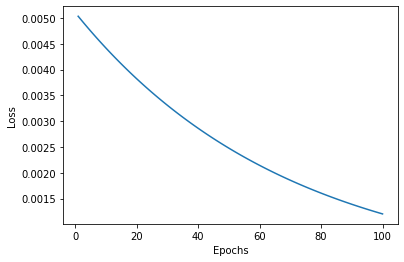

In [9]:
def plot_model_training(epoch_list, loss_list):
    plt.plot(epoch_list, loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
plot_model_training(epoch_list, loss_list)